In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import scikit_posthocs as sp

In [2]:
fn01 = pd.read_csv('../results/function_normals_01.csv')
fn234 = pd.read_csv('../results/function_normals_234.csv')

fv01 = pd.read_csv('../results/function_values_01.csv')
fv234 = pd.read_csv('../results/function_values_234.csv')

m01 = pd.read_csv('../results/mesh_01.csv')
m234 = pd.read_csv('../results/mesh_234.csv')

s01 = pd.read_csv('../results/sphere_01.csv')
s234 = pd.read_csv('../results/sphere_234.csv')

In [3]:
fn = pd.concat([fn01, fn234])
fv = pd.concat([fv01, fv234])
m = pd.concat([m01, m234])
s = pd.concat([s01, s234])

In [4]:
fn01.set_index('dir', inplace=True)
fv01.set_index('dir', inplace=True)
m01.set_index('dir', inplace=True)
s01.set_index('dir', inplace=True)

fn234.set_index('dir', inplace=True)
fv234.set_index('dir', inplace=True)
m234.set_index('dir', inplace=True)
s234.set_index('dir', inplace=True)

In [5]:
fn.set_index('dir', inplace=True)
fv.set_index('dir', inplace=True)
m.set_index('dir', inplace=True)
s.set_index('dir', inplace=True)

## Filter outliers ($\geq$ 5 standard deviations in positive direction)

In [6]:
fn01 = fn01[fn01.isna().any(axis=1) == False]
fv01 = fv01[fv01.isna().any(axis=1) == False]
m01 = m01[m01.isna().any(axis=1) == False]
s01 = s01[s01.isna().any(axis=1) == False]

fn234 = fn234[fn234.isna().any(axis=1) == False]
fv234 = fv234[fv234.isna().any(axis=1) == False]
m234 = m234[m234.isna().any(axis=1) == False]
s234 = s234[s234.isna().any(axis=1) == False]

fn01 = fn01[(stats.zscore(fn01) < 5).all(axis=1)]
fv01 = fv01[(stats.zscore(fv01) < 5).all(axis=1)]
m01 = m01[(stats.zscore(m01) < 5).all(axis=1)]
s01 = s01[(stats.zscore(s01) < 5).all(axis=1)]

fn234 = fn234[(stats.zscore(fn234) < 5).all(axis=1)]
fv234 = fv234[(stats.zscore(fv234) < 5).all(axis=1)]
m234 = m234[(stats.zscore(m234) < 5).all(axis=1)]
s234 = s234[(stats.zscore(s234) < 5).all(axis=1)]

intersection = fn01.index.intersection(fv01.index.intersection(m01.index.intersection(s01.index)))
fn01 = fn01.loc[intersection]
fv01 = fv01.loc[intersection]
m01 = m01.loc[intersection]
s01 = s01.loc[intersection]

intersection = fn234.index.intersection(fv234.index.intersection(m234.index.intersection(s234.index)))
fn234 = fn234.loc[intersection]
fv234 = fv234.loc[intersection]
m234 = m234.loc[intersection]
s234 = s234.loc[intersection]

In [7]:
fn = fn[fn.isna().any(axis=1) == False]
fv = fv[fv.isna().any(axis=1) == False]
m = m[m.isna().any(axis=1) == False]
s = s[s.isna().any(axis=1) == False]

In [8]:
numrows = fn.shape[0]
fn = fn[(stats.zscore(fn) < 5).all(axis=1)]
print(f'Filtered out {numrows - fn.shape[0]} instances.')

Filtered out 22 instances.


In [9]:
numrows = fv.shape[0]
fv = fv[(stats.zscore(fv) < 5).all(axis=1)]
print(f'Filtered out {numrows - fv.shape[0]} instances.')

Filtered out 8 instances.


In [10]:
numrows = m.shape[0]
m = m[(stats.zscore(m) < 5).all(axis=1)]
print(f'Filtered out {numrows - m.shape[0]} instances.')

Filtered out 11 instances.


In [11]:
numrows = s.shape[0]
s = s[(stats.zscore(s) < 5).all(axis=1)]
print(f'Filtered out {numrows - s.shape[0]} instances.')

Filtered out 21 instances.


Compute intersection of dataframes

In [12]:
intersection = fn.index.intersection(fv.index.intersection(m.index.intersection(s.index)))

In [13]:
fn = fn.loc[intersection]
fv = fv.loc[intersection]
m = m.loc[intersection]
s = s.loc[intersection]

In [14]:
assert fn.shape == fv.shape == m.shape == s.shape

# Explorative data analysis

In [15]:
from matplotlib import pyplot as plt

## Central weight-bearing femur

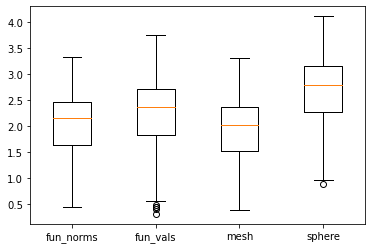

In [16]:
fig, ax = plt.subplots()
ax.boxplot([fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

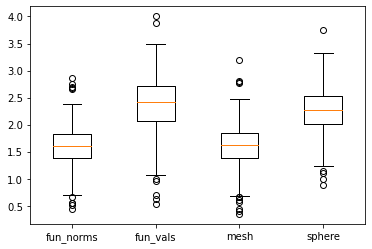

In [17]:
fig, ax = plt.subplots()
ax.boxplot([fn['icLF'], fv['icLF'], m['icLF'], s['icLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

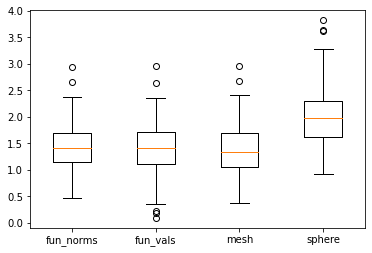

In [18]:
fig, ax = plt.subplots()
ax.boxplot([fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

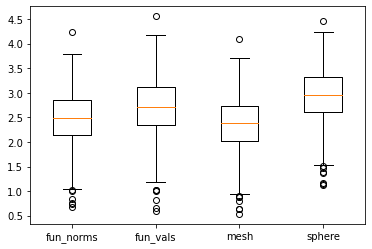

In [19]:
fig, ax = plt.subplots()
ax.boxplot([fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

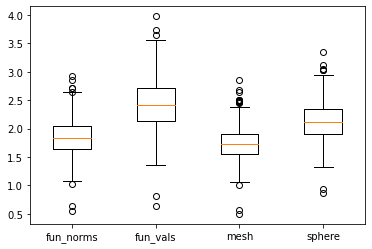

In [20]:
fig, ax = plt.subplots()
ax.boxplot([fn['icMF'], fv['icMF'], m['icMF'], s['icMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

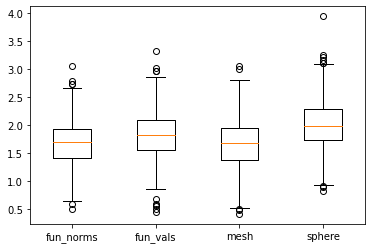

In [21]:
fig, ax = plt.subplots()
ax.boxplot([fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

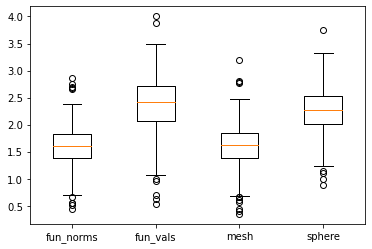

In [22]:
fig, ax = plt.subplots()
ax.boxplot([fn['icLF'], fv['icLF'], m['icLF'], s['icLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## anterior and posterior femur

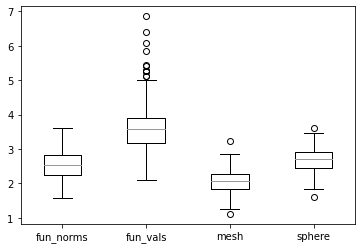

In [23]:
fig, ax = plt.subplots()
ax.boxplot([fn['aLF'], fv['aLF'], m['aLF'], s['aLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

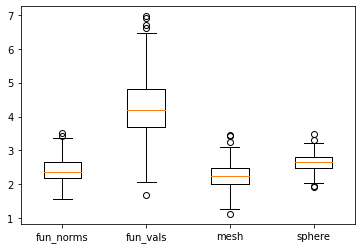

In [24]:
fig, ax = plt.subplots()
ax.boxplot([fn['aMF'], fv['aMF'], m['aMF'], s['aMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

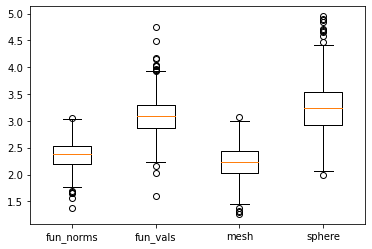

In [25]:
fig, ax = plt.subplots()
ax.boxplot([fn['pLF'], fv['pLF'], m['pLF'], s['pLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

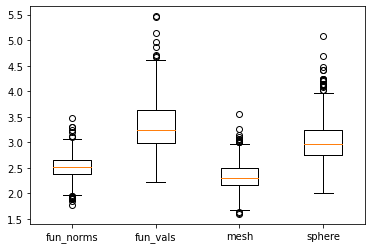

In [26]:
fig, ax = plt.subplots()
ax.boxplot([fn['pMF'], fv['pMF'], m['pMF'], s['pMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## lateral tibia

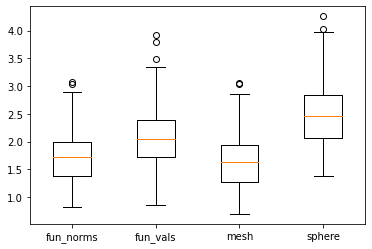

In [27]:
fig, ax = plt.subplots()
ax.boxplot([fn['cLT'], fv['cLT'], m['cLT'], s['cLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

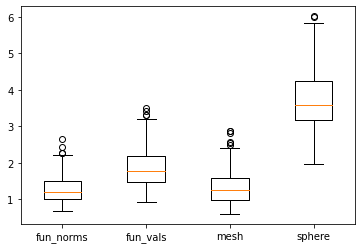

In [28]:
fig, ax = plt.subplots()
ax.boxplot([fn['iLT'], fv['iLT'], m['iLT'], s['iLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

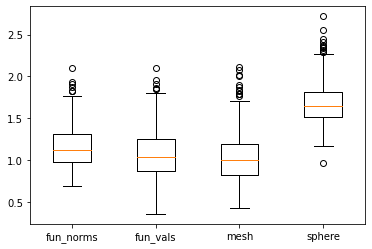

In [29]:
fig, ax = plt.subplots()
ax.boxplot([fn['eLT'], fv['eLT'], m['eLT'], s['eLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

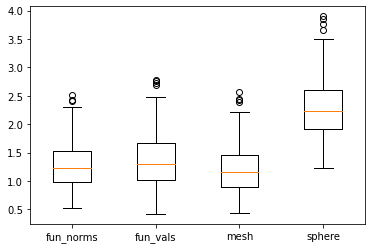

In [30]:
fig, ax = plt.subplots()
ax.boxplot([fn['aLT'], fv['aLT'], m['aLT'], s['aLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

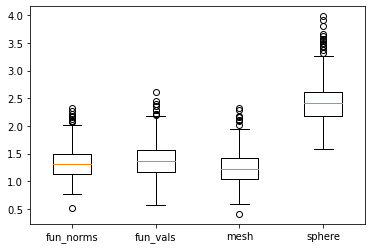

In [31]:
fig, ax = plt.subplots()
ax.boxplot([fn['pLT'], fv['pLT'], m['pLT'], s['pLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## medial tibia

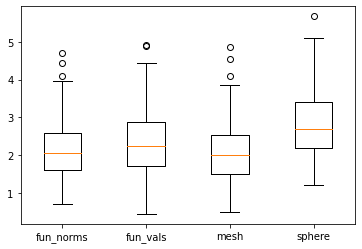

In [32]:
fig, ax = plt.subplots()
ax.boxplot([fn['cMT'], fv['cMT'], m['cMT'], s['cMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

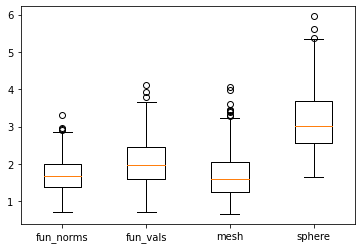

In [33]:
fig, ax = plt.subplots()
ax.boxplot([fn['iMT'], fv['iMT'], m['iMT'], s['iMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

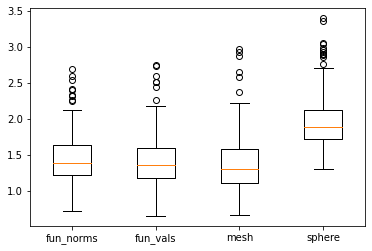

In [34]:
fig, ax = plt.subplots()
ax.boxplot([fn['eMT'], fv['eMT'], m['eMT'], s['eMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

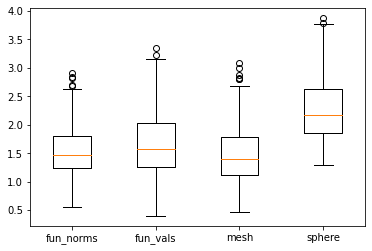

In [35]:
fig, ax = plt.subplots()
ax.boxplot([fn['aMT'], fv['aMT'], m['aMT'], s['aMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

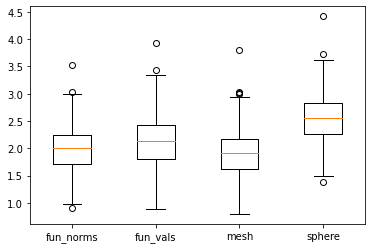

In [36]:
fig, ax = plt.subplots()
ax.boxplot([fn['pMT'], fv['pMT'], m['pMT'], s['pMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## Comparison between rOA grades 0,1 and 2,3,4

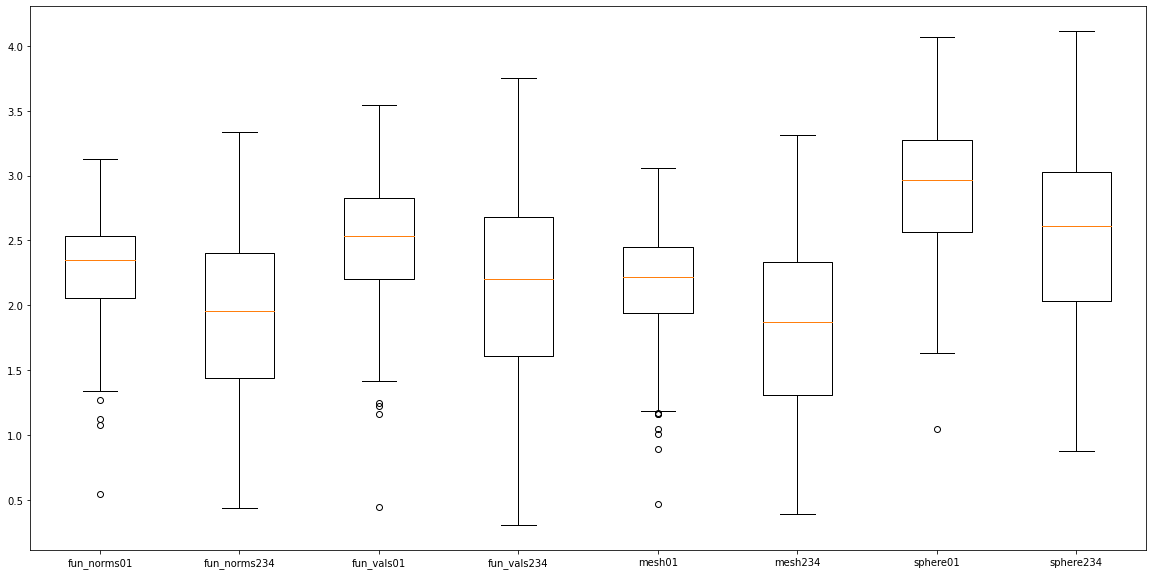

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ccLF'], fn234['ccLF'], fv01['ccLF'], fv234['ccLF'], m01['ccLF'], m234['ccLF'], s01['ccLF'], s234['ccLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

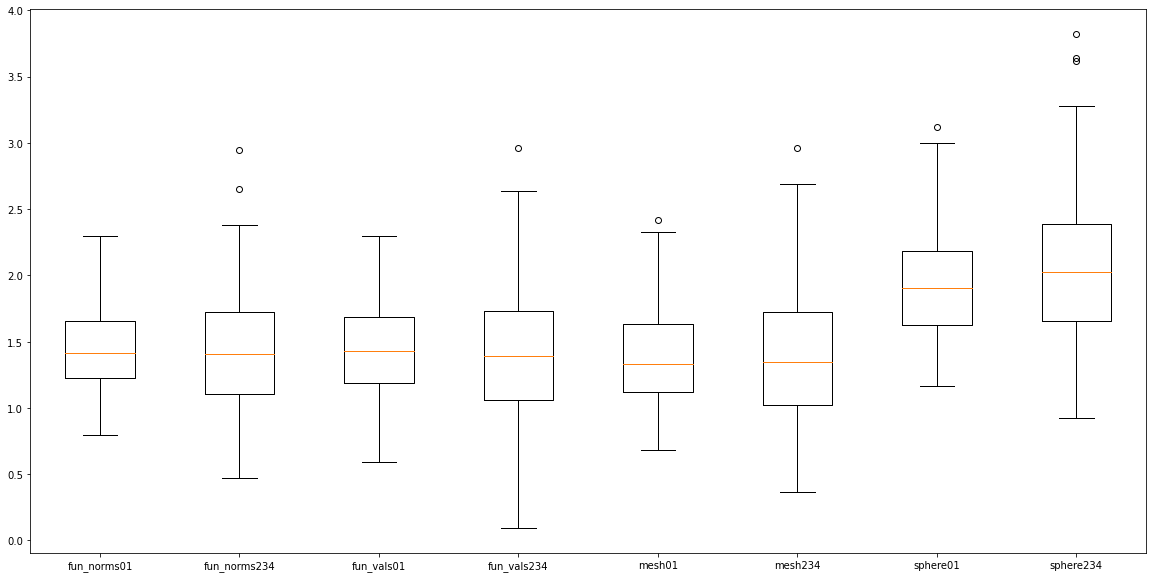

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ecLF'], fn234['ecLF'], fv01['ecLF'], fv234['ecLF'], m01['ecLF'], m234['ecLF'], s01['ecLF'], s234['ecLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

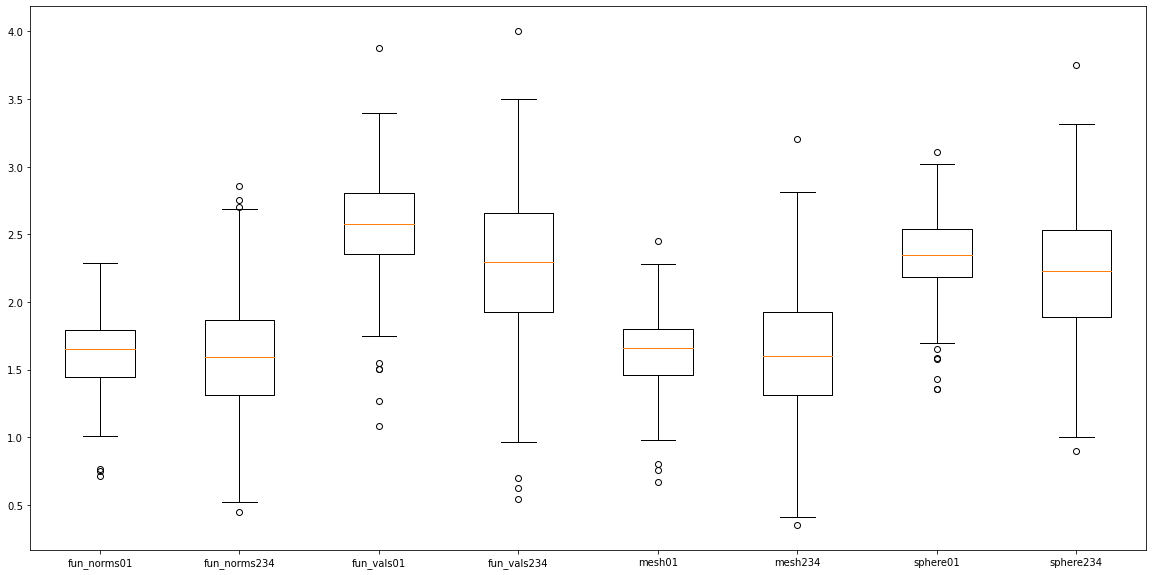

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['icLF'], fn234['icLF'], fv01['icLF'], fv234['icLF'], m01['icLF'], m234['icLF'], s01['icLF'], s234['icLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

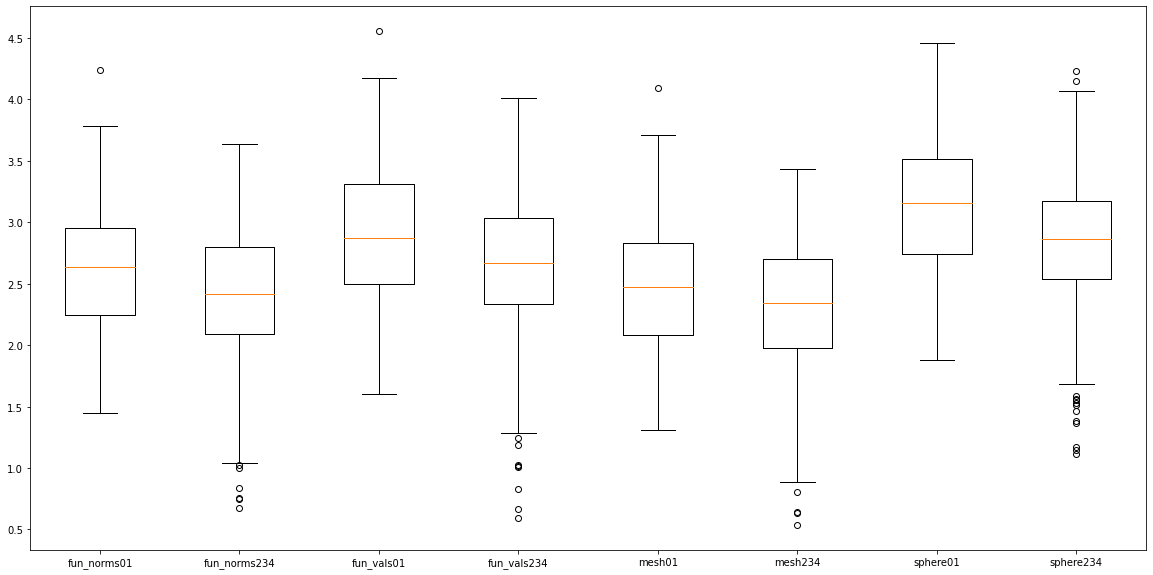

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ccMF'], fn234['ccMF'], fv01['ccMF'], fv234['ccMF'], m01['ccMF'], m234['ccMF'], s01['ccMF'], s234['ccMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

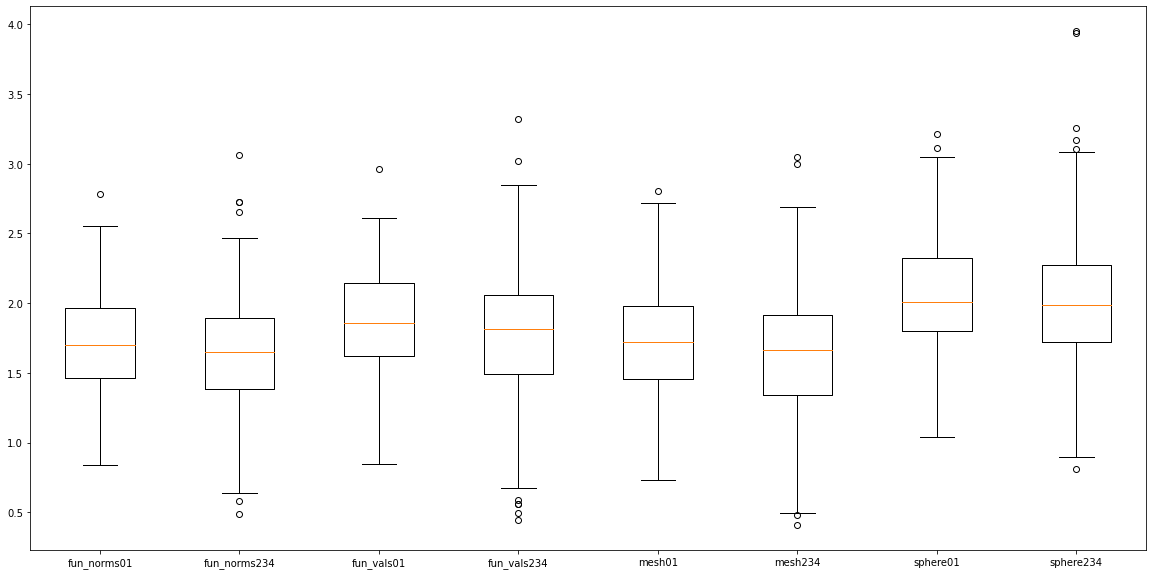

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ecMF'], fn234['ecMF'], fv01['ecMF'], fv234['ecMF'], m01['ecMF'], m234['ecMF'], s01['ecMF'], s234['ecMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

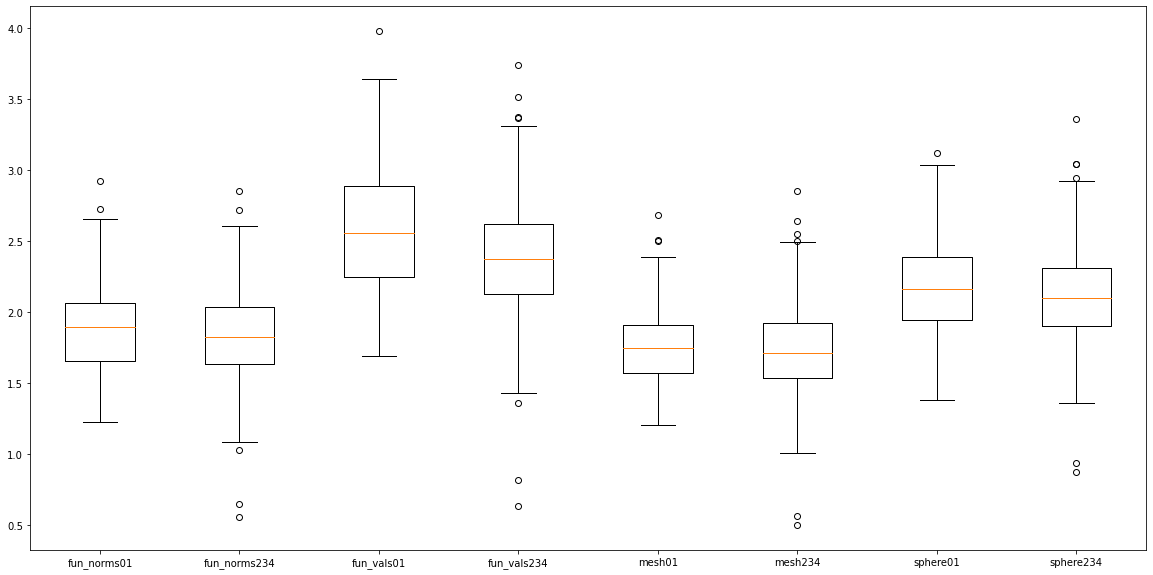

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['icMF'], fn234['icMF'], fv01['icMF'], fv234['icMF'], m01['icMF'], m234['icMF'], s01['icMF'], s234['icMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

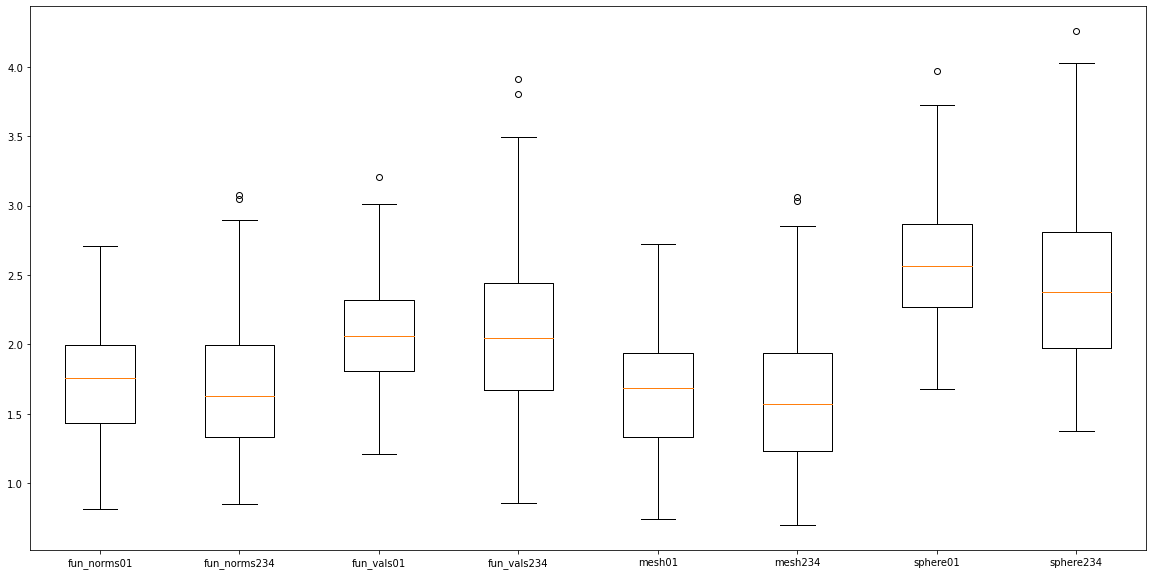

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['cLT'], fn234['cLT'], fv01['cLT'], fv234['cLT'], m01['cLT'], m234['cLT'], s01['cLT'], s234['cLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

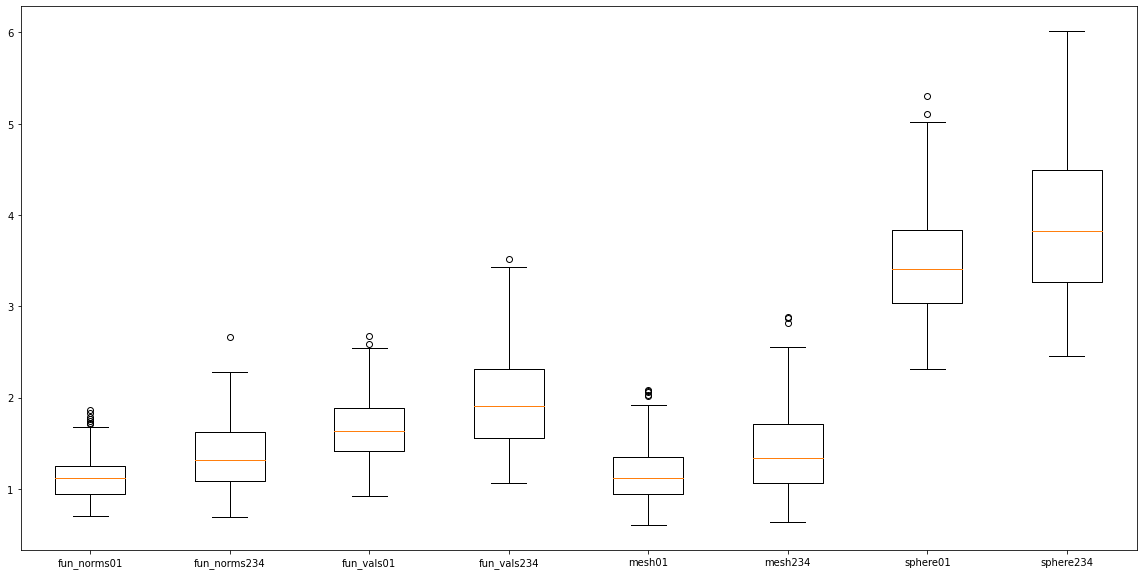

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['iLT'], fn234['iLT'], fv01['iLT'], fv234['iLT'], m01['iLT'], m234['iLT'], s01['iLT'], s234['iLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

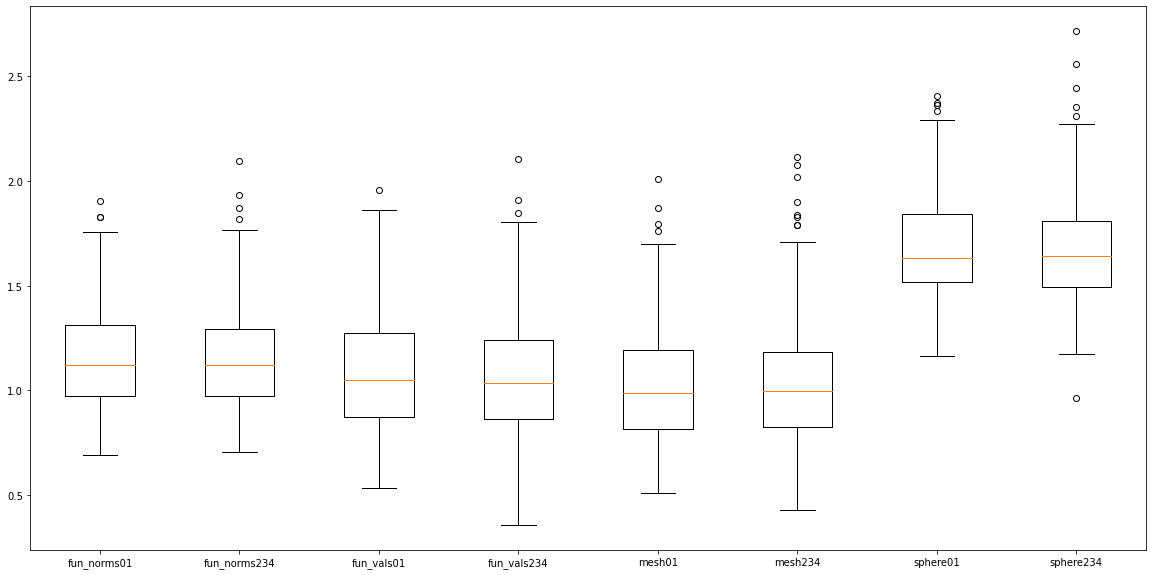

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['eLT'], fn234['eLT'], fv01['eLT'], fv234['eLT'], m01['eLT'], m234['eLT'], s01['eLT'], s234['eLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

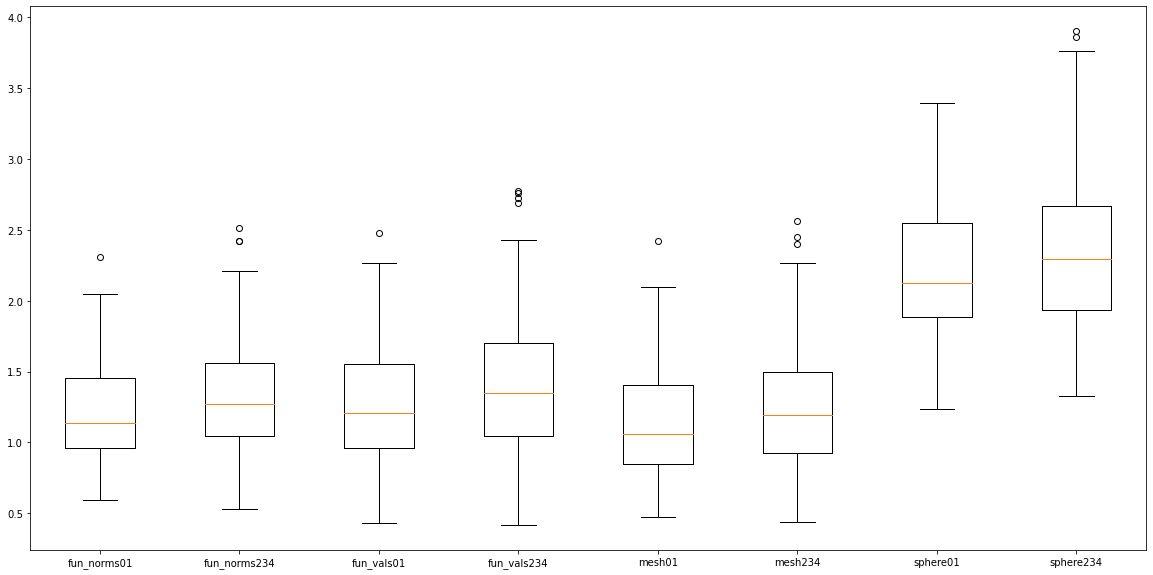

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['aLT'], fn234['aLT'], fv01['aLT'], fv234['aLT'], m01['aLT'], m234['aLT'], s01['aLT'], s234['aLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

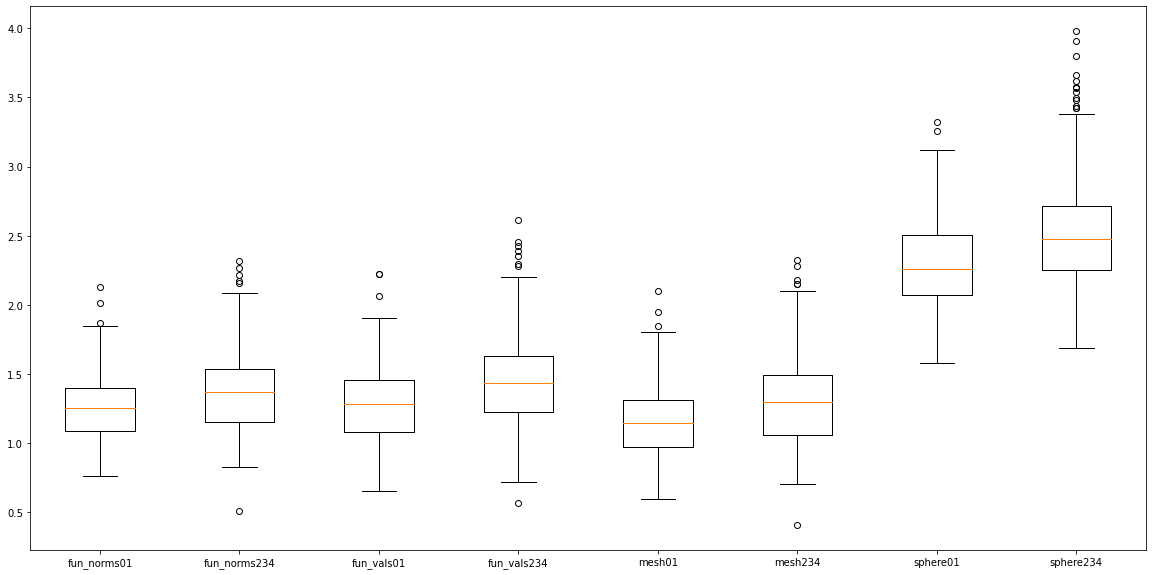

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['pLT'], fn234['pLT'], fv01['pLT'], fv234['pLT'], m01['pLT'], m234['pLT'], s01['pLT'], s234['pLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

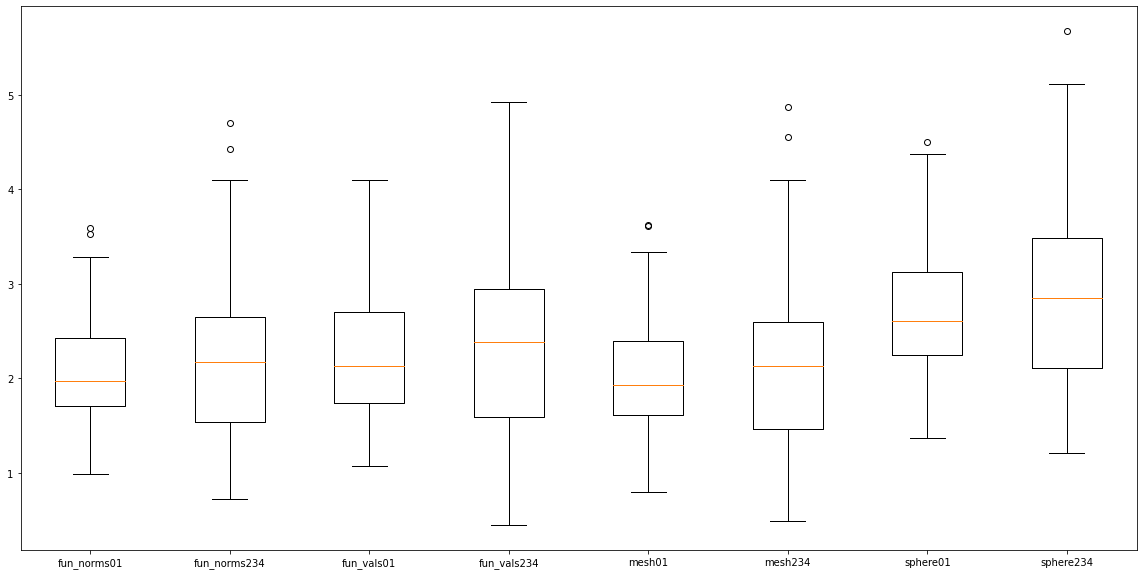

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['cMT'], fn234['cMT'], fv01['cMT'], fv234['cMT'], m01['cMT'], m234['cMT'], s01['cMT'], s234['cMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

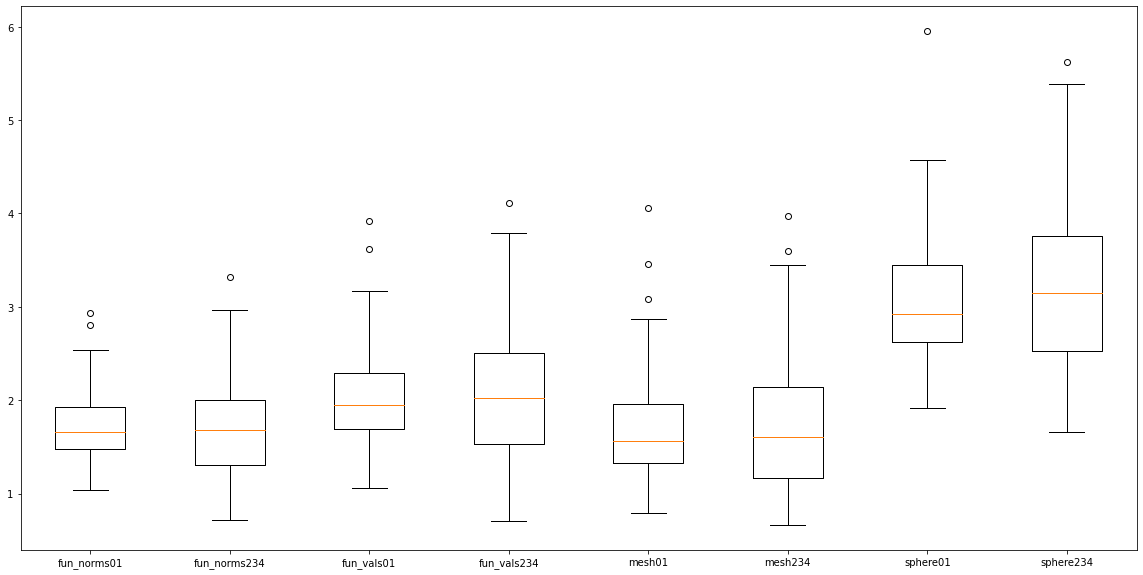

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['iMT'], fn234['iMT'], fv01['iMT'], fv234['iMT'], m01['iMT'], m234['iMT'], s01['iMT'], s234['iMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

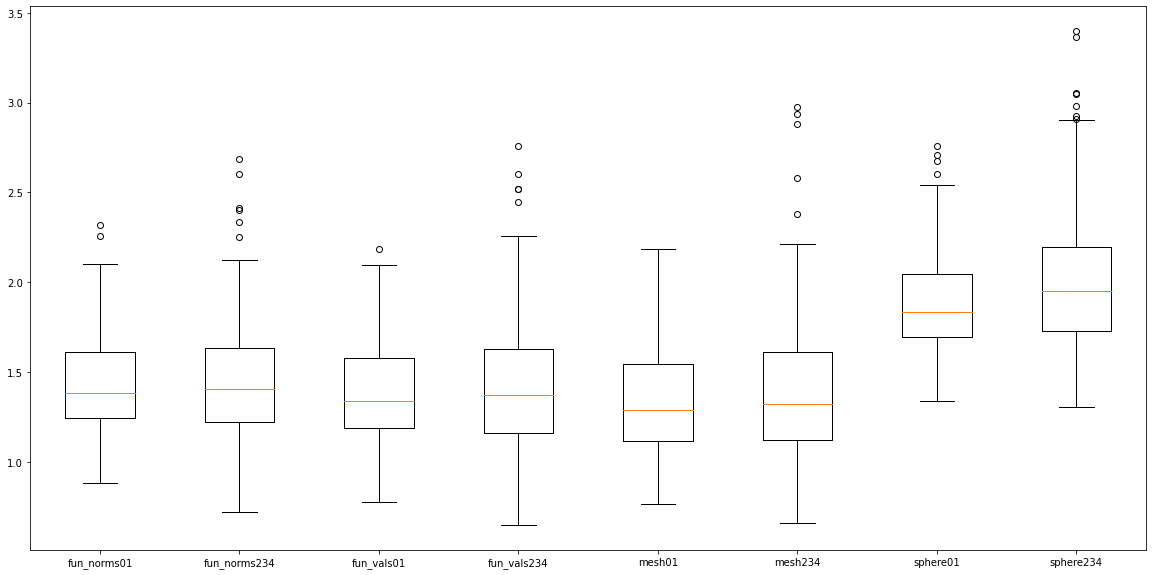

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['eMT'], fn234['eMT'], fv01['eMT'], fv234['eMT'], m01['eMT'], m234['eMT'], s01['eMT'], s234['eMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

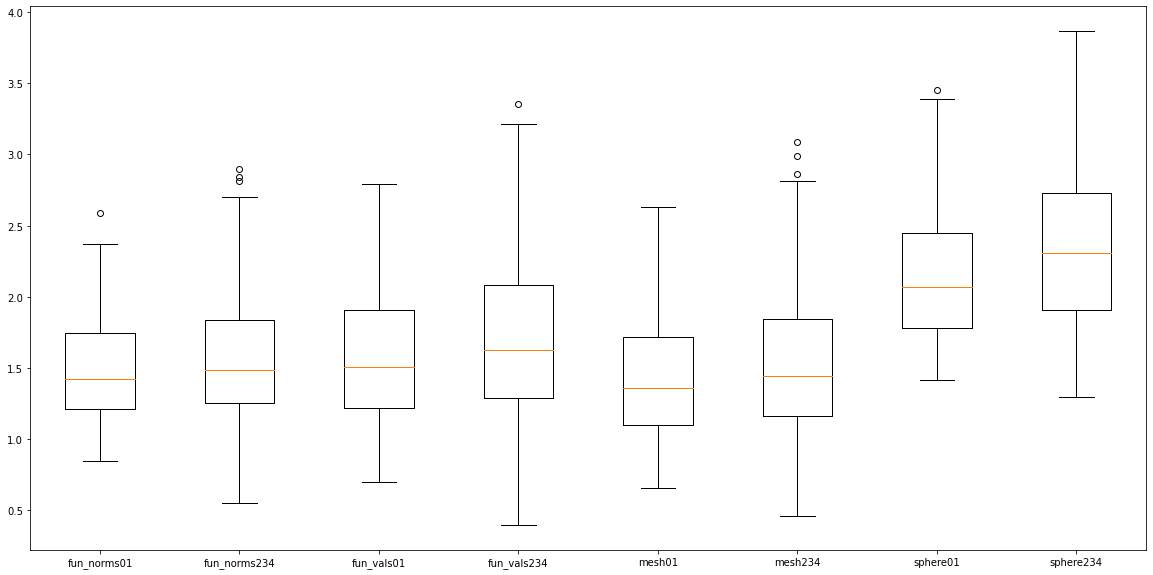

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['aMT'], fn234['aMT'], fv01['aMT'], fv234['aMT'], m01['aMT'], m234['aMT'], s01['aMT'], s234['aMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

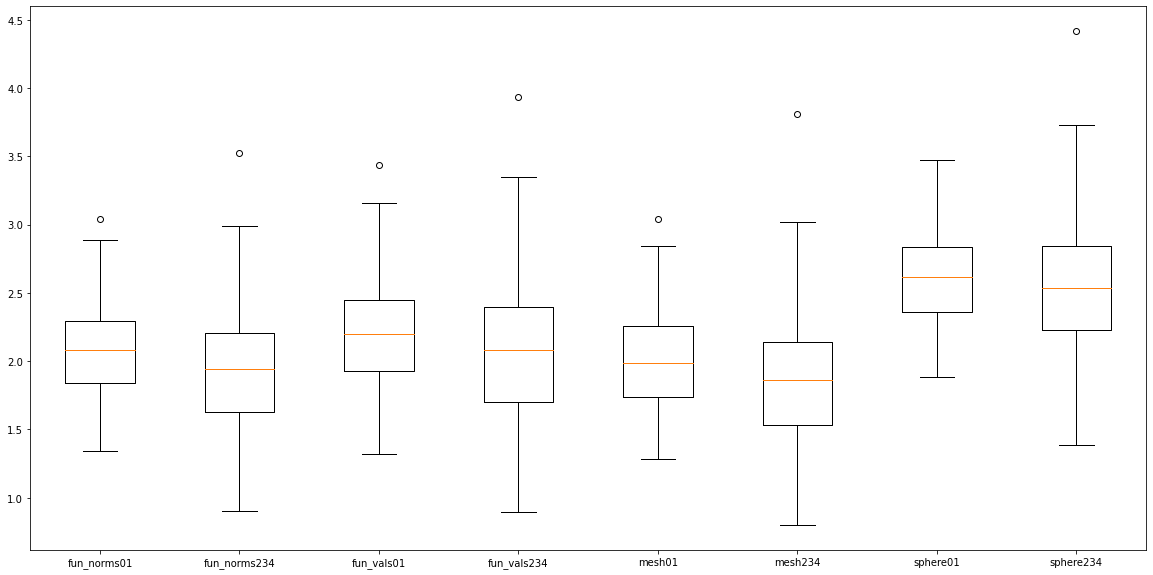

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['pMT'], fn234['pMT'], fv01['pMT'], fv234['pMT'], m01['pMT'], m234['pMT'], s01['pMT'], s234['pMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

<hr>

In [54]:
all_cols = ['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'aLF', 'aMF', 'pLF', 'pMF', 
           'cLT', 'iLT', 'eLT', 'aLT', 'pLT', 'cMT', 'iMT', 'eMT', 'aMT', 'pMT']

lf_cols = ['ecLF', 'ccLF', 'icLF', 'aLF', 'pLF']
mf_cols = ['ecMF', 'ccMF', 'icMF', 'aMF', 'pMF']
lt_cols = ['cLT', 'iLT', 'eLT', 'aLT', 'pLT']
mt_cols = ['cMT', 'iMT', 'eMT', 'aMT', 'pMT']

In [55]:
fn_all_regions_mean = fn[all_cols].apply(np.mean, axis=1)
fv_all_regions_mean = fv[all_cols].apply(np.mean, axis=1)
m_all_regions_mean = m[all_cols].apply(np.mean, axis=1)
s_all_regions_mean = s[all_cols].apply(np.mean, axis=1)

In [56]:
fn_lf_mean = fn[lf_cols].apply(np.mean, axis=1)
fn_mf_mean = fn[mf_cols].apply(np.mean, axis=1)
fn_lt_mean = fn[lt_cols].apply(np.mean, axis=1)
fn_mt_mean = fn[mt_cols].apply(np.mean, axis=1)

In [57]:
fv_lf_mean = fv[lf_cols].apply(np.mean, axis=1)
fv_mf_mean = fv[mf_cols].apply(np.mean, axis=1)
fv_lt_mean = fv[lt_cols].apply(np.mean, axis=1)
fv_mt_mean = fv[mt_cols].apply(np.mean, axis=1)

In [58]:
m_lf_mean = m[lf_cols].apply(np.mean, axis=1)
m_mf_mean = m[mf_cols].apply(np.mean, axis=1)
m_lt_mean = m[lt_cols].apply(np.mean, axis=1)
m_mt_mean = m[mt_cols].apply(np.mean, axis=1)

In [59]:
s_lf_mean = s[lf_cols].apply(np.mean, axis=1)
s_mf_mean = s[mf_cols].apply(np.mean, axis=1)
s_lt_mean = s[lt_cols].apply(np.mean, axis=1)
s_mt_mean = s[mt_cols].apply(np.mean, axis=1)

In [60]:
fn_all_regions = fn[all_cols]
fv_all_regions = fv[all_cols]
m_all_regions = m[all_cols]
s_all_regions = s[all_cols]

# T-test for rOA 0,1 vs 2,3,4

In [159]:
roa_01_overall_mean = (fn01[all_cols] + fv01[all_cols] + m01[all_cols] + s01[all_cols]) / 4
roa_234_overall_mean = (fn234[all_cols] + fv234[all_cols] + m234[all_cols] + s234[all_cols]) / 4

In [160]:
roa_01_fold = roa_01_overall_mean.apply(np.mean, axis=1)
roa_234_fold = roa_234_overall_mean.apply(np.mean, axis=1)
stats.ttest_ind_from_stats(roa_01_fold.mean(), roa_01_fold.std(), roa_01_fold.shape[0], roa_234_fold.mean(), roa_234_fold.std(), roa_234_fold.shape[0])

Ttest_indResult(statistic=-0.2720886350513451, pvalue=0.7856985956582944)

In [163]:
stats.t.ppf(.05, roa_01_fold.shape[0] + roa_234_fold.shape[0] - 2)

-1.6487903176773229

In [164]:
print(roa_01_fold.mean(), roa_234_fold.mean())

2.0780455111167435 2.0857087387091404


In [168]:
df = roa_01_overall_mean.shape[0] + roa_234_overall_mean.shape[0] - 2
sigdif = stats.ttest_ind(roa_01_overall_mean.to_numpy(), roa_234_overall_mean.to_numpy())[0] >= stats.t.ppf(.05, df)

In [172]:
roa_01_overall_mean.columns[sigdif]

Index(['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'aLF', 'pLF', 'cLT',
       'eLT', 'cMT', 'iMT', 'eMT', 'pMT'],
      dtype='object')

# ANOVA for mean over all regions

$$H_0: \mu_{fn} = \mu_{fv} = \mu_{m} = \mu_{s}$$ 

In [61]:
f, p = stats.f_oneway(fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy())
print(f, p)

757.5586921840005 1.2541029217904408e-304


In [62]:
df_within = 4 * (len(fn_all_regions_mean.to_numpy()) - 1)
df_between = 4 - 1

f_crit = stats.f.ppf(q=.95, dfn=df_between, dfd=df_within)
print(f_crit, df_within, df_between)

2.6105629753207253 1572 3


$F(2,1290) = 665.77 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

### effect size with $\omega^2$

$$\omega^2 = \frac{SS_{between} - (p - 1) \cdot \hat{\sigma}^2_{within}}{SS_{total} + \hat{\sigma}^2_{within}}$$
where
$$SS_{between} = n \cdot \sum_{1}^{p}(\bar{X}_i - \bar{X})^2$$
$$SS_{within} = \sum_{1}^{p}\sum_{j}^{k}(x_{ij} - \bar{X}_i)^2$$
$$SS_{total} = SS_{between} + SS_{within}$$
$$\hat{\sigma}^2_{within} = \frac{SS_{within}}{n - 1}$$
$$n \:\text{is the sample size per group}$$
$$p \:\text{is the number of groups}$$

In [63]:
def omega_squared(*samples: pd.core.series.Series) -> float:
    tmp = [len(sample) for sample in samples]
    assert len(set(tmp)) == 1
    
    groups = [sample.to_numpy() for sample in samples]
    n = len(groups[0])
    p = len(groups)
    all_mean = np.mean(np.concatenate(groups))
    group_means = [np.mean(group) for group in groups]
    ss_between = n * sum([(x_i - all_mean)**2 for x_i in group_means])
    ss_within = 0
    for i in range(p):
        ss_within += sum([(x_ij - group_means[i])**2 for x_ij in groups[i]])
    
    var_within = ss_within / (n - 1)
    return (ss_between - (p - 1) * var_within) / (ss_between + ss_within + var_within)

In [64]:
omega_squared(fn_all_regions_mean, fv_all_regions_mean, m_all_regions_mean, s_all_regions_mean)

0.5873905809650064

In [65]:
n = len(fn_all_regions_mean.to_numpy())
p = 4
all_mean = np.mean(np.concatenate((fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy())))
group_means = [np.mean(fn_all_regions_mean.to_numpy()), np.mean(fv_all_regions_mean.to_numpy()),
               np.mean(m_all_regions_mean.to_numpy()), np.mean(s_all_regions_mean.to_numpy())]
ss_between = n * sum([(x_i - all_mean)**2 for x_i in group_means])
ss_within = sum([(x_ij - group_means[0])**2 for x_ij in fn_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[1])**2 for x_ij in fv_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[2])**2 for x_ij in m_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[3])**2 for x_ij in s_all_regions_mean.to_numpy()])
eta_square = ss_between / (ss_between + ss_within)
print(eta_square)
var_within = ss_within / (n - 1)
omega_square = (ss_between - (p - 1) * var_within) / (ss_between + ss_within + var_within)
print(omega_square)

0.5911229012016513
0.5873905809650064


### post-hoc Tukey's HSD

In [66]:
def tukeys_hsd(labels: list, *samples: pd.core.series.Series) -> pd.core.frame.DataFrame:
    tmp = [len(sample) for sample in samples]
    assert len(set(tmp)) == 1
    
    x = [sample.to_numpy() for sample in samples]
    l = len(x[0])
    g = [[label] * l for label in labels]
    return sp.posthoc_tukey_hsd(x=np.concatenate(x), g=np.concatenate(g), alpha=.05)

In [67]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_all_regions_mean, fv_all_regions_mean, m_all_regions_mean, s_all_regions_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [68]:
x = [fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy()]
l = len(fn_all_regions_mean.to_numpy())
g = [['fn'] * l, ['fv'] * l, ['m'] * l, ['s'] * l]
sp.posthoc_tukey_hsd(x=np.concatenate(x), g=np.concatenate(g), alpha=.05)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


# ANOVA for mean over lateral/medial femur/tibia

### lateral femur

In [69]:
f, p = stats.f_oneway(fn_lf_mean.to_numpy(), fv_lf_mean.to_numpy(), m_lf_mean.to_numpy(), s_lf_mean.to_numpy())
print(f, p)

434.9525878234829 1.0736703226819147e-205


$F(2,1290) = 190.72 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [70]:
omega_squared(fn_lf_mean, fv_lf_mean, m_lf_mean, s_lf_mean)

0.44877528486966933

In [71]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_lf_mean, fv_lf_mean, m_lf_mean, s_lf_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,0
m,1,1,1,1
s,1,0,1,1


### medial femur

In [72]:
f, p = stats.f_oneway(fn_mf_mean.to_numpy(), fv_mf_mean.to_numpy(), m_mf_mean.to_numpy(), s_mf_mean.to_numpy())
print(f, p)

545.2093854760082 8.043573856975606e-243


$F(2,1290) = 533.09 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [73]:
omega_squared(fn_mf_mean, fv_mf_mean, m_mf_mean, s_mf_mean)

0.5055467436908465

In [74]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_mf_mean, fv_mf_mean, m_mf_mean, s_mf_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


### lateral tibia

In [75]:
f, p = stats.f_oneway(fn_lt_mean.to_numpy(), fv_lt_mean.to_numpy(), m_lt_mean.to_numpy(), s_lt_mean.to_numpy())
print(f, p)

1323.8700990290024 0.0


$F(2,1290) = 1361.18 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [76]:
omega_squared(fn_lt_mean, fv_lt_mean, m_lt_mean, s_lt_mean)

0.7137506214461669

In [77]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_lt_mean, fv_lt_mean, m_lt_mean, s_lt_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


### medial tibia

In [78]:
f, p = stats.f_oneway(fn_mt_mean.to_numpy(), fv_mt_mean.to_numpy(), m_mt_mean.to_numpy(), s_mt_mean.to_numpy())
print(f, p)

298.9454136479572 1.5621736886413548e-153


$F(2,1290) = 328.86 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [79]:
omega_squared(fn_mt_mean, fv_mt_mean, m_mt_mean, s_mt_mean)

0.35782241714725627

In [80]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_mt_mean, fv_mt_mean, m_mt_mean, s_mt_mean)

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


# ANOVA for subregions

In [81]:
f, p = stats.f_oneway(fn['ccLF'].to_numpy(), fv['ccLF'].to_numpy(), m['ccLF'].to_numpy(), s['ccLF'].to_numpy())
print(f, p)

101.89792963016951 2.819974366169454e-60


In [82]:
omega_squared(fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF'])

0.1560794804258123

In [83]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [84]:
f, p = stats.f_oneway(fn['icLF'].to_numpy(), fv['icLF'].to_numpy(), m['icLF'].to_numpy(), s['icLF'].to_numpy())
print(f, p)

349.9722224819473 4.7786874067718735e-174


In [85]:
omega_squared(fn['icLF'], fv['icLF'], m['icLF'], s['icLF'])

0.395258798694246

In [86]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['icLF'], fv['icLF'], m['icLF'], s['icLF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [87]:
f, p = stats.f_oneway(fn['ecLF'].to_numpy(), fv['ecLF'].to_numpy(), m['ecLF'].to_numpy(), s['ecLF'].to_numpy())
print(f, p)

181.4417009037046 5.1315737599252045e-101


In [88]:
omega_squared(fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF'])

0.25105824669550253

In [89]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF'])

,fn,fv,m,s
fn,1,0,0,1
fv,0,1,0,1
m,0,0,1,1
s,1,1,1,1


In [90]:
f, p = stats.f_oneway(fn['ccMF'].to_numpy(), fv['ccMF'].to_numpy(), m['ccMF'].to_numpy(), s['ccMF'].to_numpy())
print(f, p)

77.18713005252967 1.4102281157707493e-46


In [91]:
omega_squared(fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF'])

0.12146828946066769

In [92]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [93]:
f, p = stats.f_oneway(fn['icMF'].to_numpy(), fv['icMF'].to_numpy(), m['icMF'].to_numpy(), s['icMF'].to_numpy())
print(f, p)

285.7407235986666 5.118489288980332e-148


In [94]:
omega_squared(fn['icMF'], fv['icMF'], m['icMF'], s['icMF'])

0.3473674459079483

In [95]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['icMF'], fv['icMF'], m['icMF'], s['icMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [96]:
f, p = stats.f_oneway(fn['ecMF'].to_numpy(), fv['ecMF'].to_numpy(), m['ecMF'].to_numpy(), s['ecMF'].to_numpy())
print(f, p)

62.96827513322083 1.9107264000418975e-38


In [97]:
omega_squared(fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF'])

0.10023476782075326

In [98]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [99]:
f, p = stats.f_oneway(fn['aLF'].to_numpy(), fv['aLF'].to_numpy(), m['aLF'].to_numpy(), s['aLF'].to_numpy())
print(f, p)

802.1329209058372 2.7061286e-316


In [100]:
omega_squared(fn['aLF'], fv['aLF'], m['aLF'], s['aLF'])

0.6012453562243527

In [101]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aLF'], fv['aLF'], m['aLF'], s['aLF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [102]:
f, p = stats.f_oneway(fn['aMF'].to_numpy(), fv['aMF'].to_numpy(), m['aMF'].to_numpy(), s['aMF'].to_numpy())
print(f, p)

1361.4807703322183 0.0


In [103]:
omega_squared(fn['aMF'], fv['aMF'], m['aMF'], s['aMF'])

0.7194565525533294

In [104]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aMF'], fv['aMF'], m['aMF'], s['aMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [105]:
f, p = stats.f_oneway(fn['pLF'].to_numpy(), fv['pLF'].to_numpy(), m['pLF'].to_numpy(), s['pLF'].to_numpy())
print(f, p)

767.3046113482781 3.2610928003002028e-307


In [106]:
omega_squared(fn['pLF'], fv['pLF'], m['pLF'], s['pLF'])

0.5905014737411931

In [107]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pLF'], fv['pLF'], m['pLF'], s['pLF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [108]:
f, p = stats.f_oneway(fn['pMF'].to_numpy(), fv['pMF'].to_numpy(), m['pMF'].to_numpy(), s['pMF'].to_numpy())
print(f, p)

532.8516156438737 7.435598349998874e-239


In [109]:
omega_squared(fn['pMF'], fv['pMF'], m['pMF'], s['pMF'])

0.4997723849266963

In [110]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pMF'], fv['pMF'], m['pMF'], s['pMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [111]:
f, p = stats.f_oneway(fn['cLT'].to_numpy(), fv['cLT'].to_numpy(), m['cLT'].to_numpy(), s['cLT'].to_numpy())
print(f, p)

270.94553587845735 9.91729733313608e-142


In [112]:
omega_squared(fn['cLT'], fv['cLT'], m['cLT'], s['cLT'])

0.33524126559166073

In [113]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['cLT'], fv['cLT'], m['cLT'], s['cLT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [114]:
f, p = stats.f_oneway(fn['iLT'].to_numpy(), fv['iLT'].to_numpy(), m['iLT'].to_numpy(), s['iLT'].to_numpy())
print(f, p)

1903.3301868923436 0.0


In [115]:
omega_squared(fn['iLT'], fv['iLT'], m['iLT'], s['iLT'])

0.7820474804660686

In [116]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['iLT'], fv['iLT'], m['iLT'], s['iLT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [117]:
f, p = stats.f_oneway(fn['eLT'].to_numpy(), fv['eLT'].to_numpy(), m['eLT'].to_numpy(), s['eLT'].to_numpy())
print(f, p)

442.26970368376465 2.742033171419283e-208


In [118]:
omega_squared(fn['eLT'], fv['eLT'], m['eLT'], s['eLT'])

0.4529437040987916

In [119]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['eLT'], fv['eLT'], m['eLT'], s['eLT'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,0,1
m,1,0,1,1
s,1,1,1,1


In [120]:
f, p = stats.f_oneway(fn['aLT'].to_numpy(), fv['aLT'].to_numpy(), m['aLT'].to_numpy(), s['aLT'].to_numpy())
print(f, p)

520.0027077871144 1.1071780448478368e-234


In [121]:
omega_squared(fn['aLT'], fv['aLT'], m['aLT'], s['aLT'])

0.49362376067511726

In [122]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aLT'], fv['aLT'], m['aLT'], s['aLT'])

,fn,fv,m,s
fn,1,0,0,1
fv,0,1,1,1
m,0,1,1,1
s,1,1,1,1


In [123]:
f, p = stats.f_oneway(fn['pLT'].to_numpy(), fv['pLT'].to_numpy(), m['pLT'].to_numpy(), s['pLT'].to_numpy())
print(f, p)

1133.7862493744585 0.0


In [124]:
omega_squared(fn['pLT'], fv['pLT'], m['pLT'], s['pLT'])

0.6809552856525105

In [125]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pLT'], fv['pLT'], m['pLT'], s['pLT'])

,fn,fv,m,s
fn,1,0,1,1
fv,0,1,1,1
m,1,1,1,1
s,1,1,1,1


In [126]:
f, p = stats.f_oneway(fn['cMT'].to_numpy(), fv['cMT'].to_numpy(), m['cMT'].to_numpy(), s['cMT'].to_numpy())
print(f, p)

79.35567861009478 8.421354758009904e-48


In [127]:
omega_squared(fn['cMT'], fv['cMT'], m['cMT'], s['cMT'])

0.12461889851099965

In [128]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['cMT'], fv['cMT'], m['cMT'], s['cMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [129]:
f, p = stats.f_oneway(fn['iMT'].to_numpy(), fv['iMT'].to_numpy(), m['iMT'].to_numpy(), s['iMT'].to_numpy())
print(f, p)

464.75853688771343 3.892340491356314e-216


In [130]:
omega_squared(fn['iMT'], fv['iMT'], m['iMT'], s['iMT'])

0.4653694780716107

In [131]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['iMT'], fv['iMT'], m['iMT'], s['iMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [132]:
f, p = stats.f_oneway(fn['eMT'].to_numpy(), fv['eMT'].to_numpy(), m['eMT'].to_numpy(), s['eMT'].to_numpy())
print(f, p)

258.2661682981105 3.006113655337485e-136


In [133]:
omega_squared(fn['eMT'], fv['eMT'], m['eMT'], s['eMT'])

0.32448485197952714

In [134]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['eMT'], fv['eMT'], m['eMT'], s['eMT'])

,fn,fv,m,s
fn,1,0,1,1
fv,0,1,0,1
m,1,0,1,1
s,1,1,1,1


In [135]:
f, p = stats.f_oneway(fn['aMT'].to_numpy(), fv['aMT'].to_numpy(), m['aMT'].to_numpy(), s['aMT'].to_numpy())
print(f, p)

219.47840484361873 6.509598884425969e-119


In [136]:
omega_squared(fn['aMT'], fv['aMT'], m['aMT'], s['aMT'])

0.2893058658971153

In [137]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aMT'], fv['aMT'], m['aMT'], s['aMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [138]:
f, p = stats.f_oneway(fn['pMT'].to_numpy(), fv['pMT'].to_numpy(), m['pMT'].to_numpy(), s['pMT'].to_numpy())
print(f, p)

188.80353315973548 1.4885100122906552e-104


In [139]:
omega_squared(fn['pMT'], fv['pMT'], m['pMT'], s['pMT'])

0.25877887255317755

In [140]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pMT'], fv['pMT'], m['pMT'], s['pMT'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1
